<a href="https://colab.research.google.com/github/bsong75/brendensong.github.io/blob/main/NLP_PDF_LDA_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bertopic


In [ ]:
!pip install PyPDF2

In [ ]:
!pip install textract

In [32]:
from bertopic import BERTopic
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import PyPDF2, urllib.request, nltk, textract
import docx2txt

# 1. Scrape PDF documents

In [ ]:
dir_Path=' '

In [28]:
npr_df=pd.read_csv('npr.csv')

In [29]:
npr_df

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."
...,...
11987,The number of law enforcement officers shot an...
11988,"Trump is busy these days with victory tours,..."
11989,It’s always interesting for the Goats and Soda...
11990,The election of Donald Trump was a surprise to...


# 2. Obtain texts

In [13]:
docs = fetch_20newsgroups (subset='all')['data']

In [16]:
df= pd.DataFrame(docs, columns=['articles'])

In [21]:
len(df.iat[159,0])

874

#3. Latent Dirichlet Allocation (LDA) with Countvectorizer

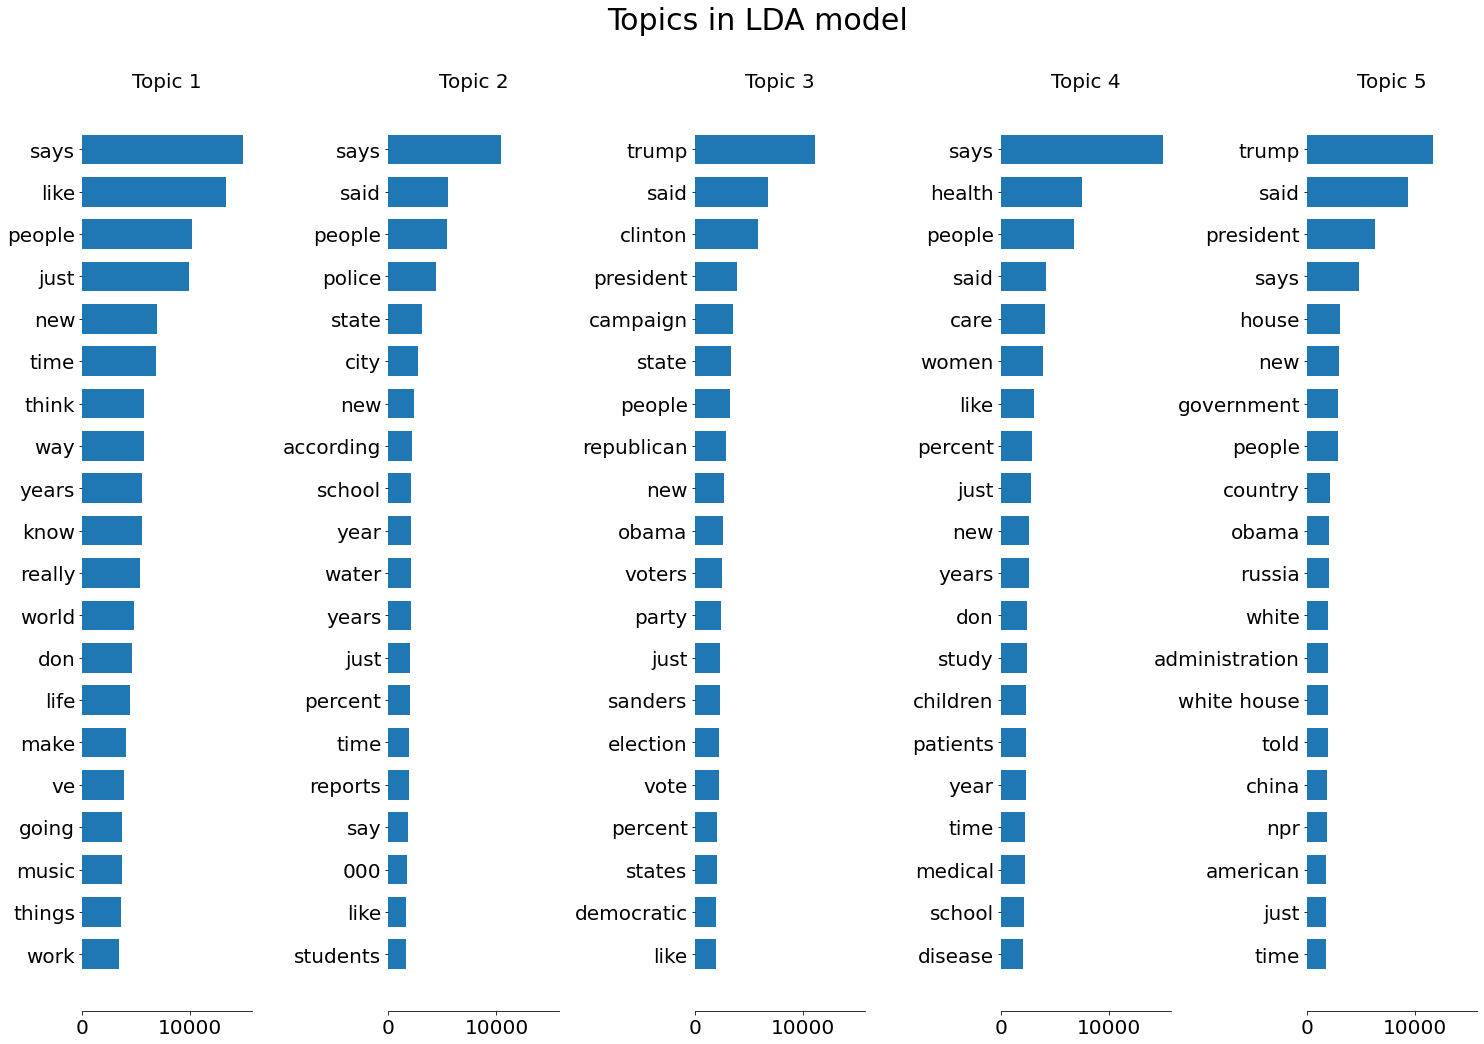

In [30]:
# discard the terms that appear 50% or more documents
# min_df: it has to appear in at least 2 documents

cv=CountVectorizer(max_df=0.9, min_df=2, 
                   ngram_range=(1,3),
                   stop_words='english'
                    )
dtm = cv.fit_transform(npr_df['Article'])
LDA= LatentDirichletAllocation(n_components=5,
                               # max_iter=80,
                               random_state=24)
LDA.fit(dtm)
#Grab the vocabulary of words
lda_dtm_feature_names=cv.get_feature_names()

import matplotlib.pyplot as plt
def lda_plot_top_words(model, feature_names, n_top_words, title):
    fig, axes= plt.subplots(1,5, figsize=(25,15), sharex=True)
    axes=axes.flatten()
    #LDA components provides you with an array.  Get the # of topics
    for topic_idx, topic in enumerate(model.components_):
        # Grabe the # of words
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                        fontdict={'fontsize':20})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)
    plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.8, hspace=0.3)
    plt.show()

%matplotlib inline
n_top_words =20
#The words have the highest probability rates for each topic
lda_plot_top_words (LDA, lda_dtm_feature_names, n_top_words, 'Topics in LDA model')
                            

# 3. NMF with TFIDF

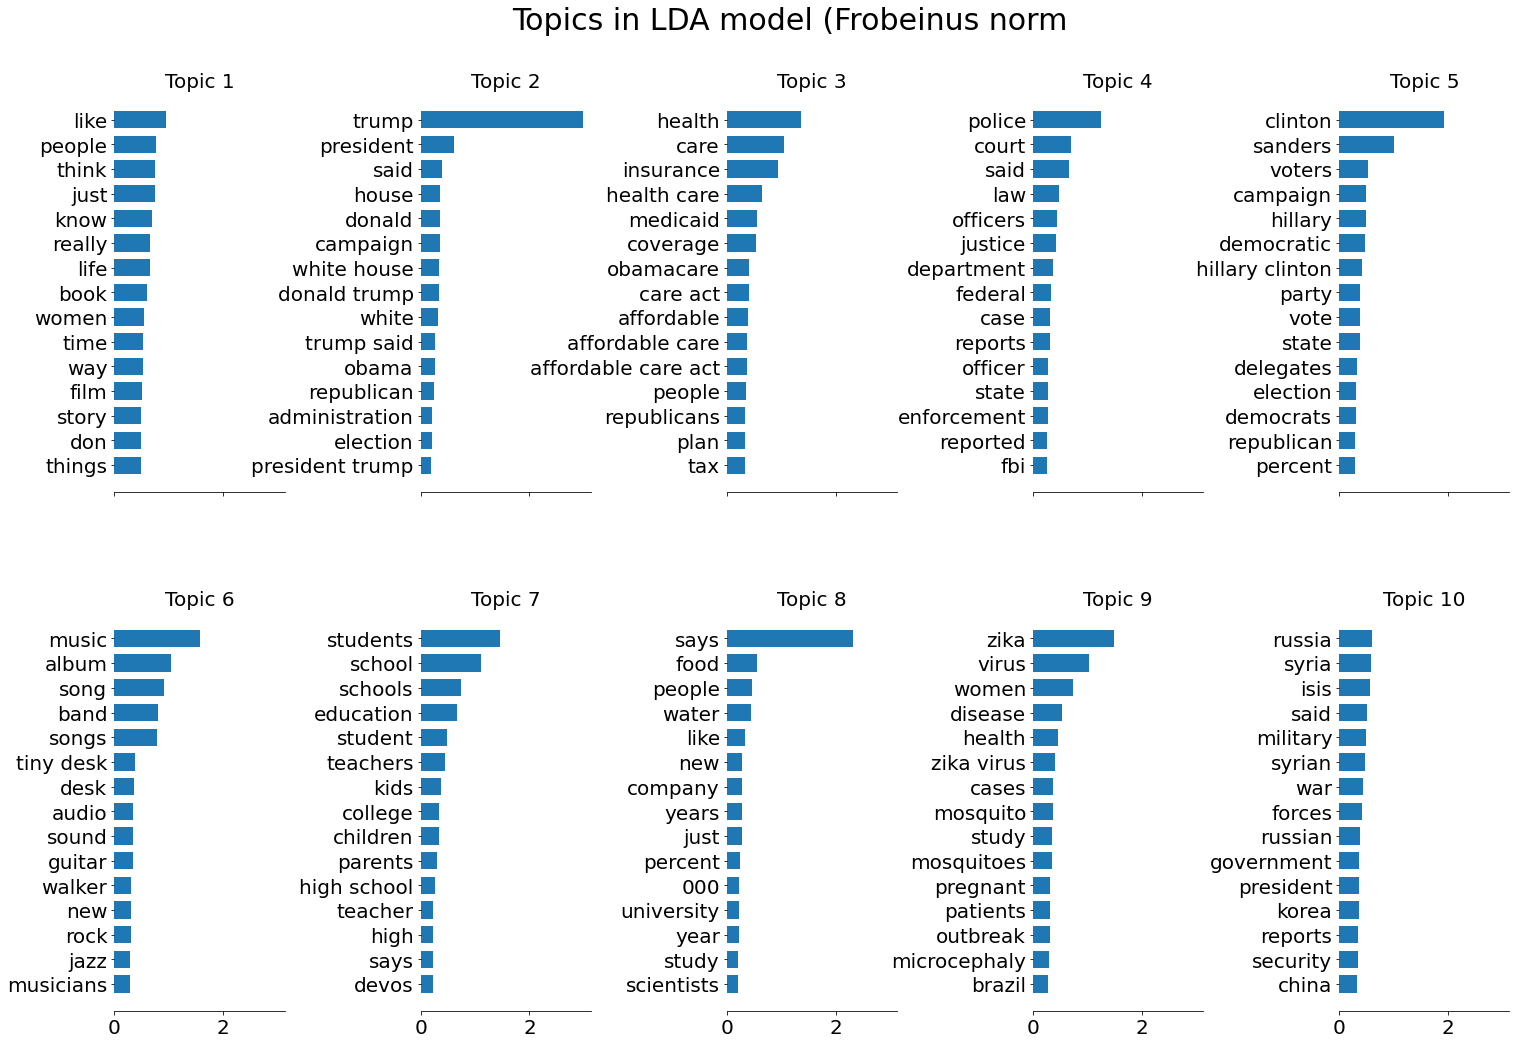

In [34]:
n_samples= 2000
n_features=5000
n_components=10
n_top_words=15


# discard the terms that appear 50% or more documents
# min_df: it has to appear in at least 2 documents

tfidf_vectorizer=TfidfVectorizer(max_df=0.9, min_df=2, 
                                   ngram_range=(1,3),
                                   max_features=n_features,
                                   stop_words='english'
                                )
dtm_nmf = tfidf_vectorizer.fit_transform(npr_df['Article'])
nmf= NMF(n_components=n_components, 
                               # max_iter=80,
                               random_state=24)
nmf.fit(dtm_nmf)
#Grab the vocabulary of words
nmf_dtm_feature_names=tfidf_vectorizer.get_feature_names()

def nmf_plot_top_words(model, feature_names, n_top_words, title):
    fig, axes= plt.subplots(2,5, figsize=(25,15), sharex=True)
    axes=axes.flatten()
    #LDA components provides you with an array.  Get the # of topics
    for topic_idx, topic in enumerate(model.components_):
        # Grabe the # of words
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                        fontdict={'fontsize':20})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)
    plt.subplots_adjust(top=0.9, bottom=0.05, wspace=0.8, hspace=0.3)
    plt.show()
%matplotlib inline
#The words have the highest probability rates for each topic
nmf_plot_top_words (nmf, nmf_dtm_feature_names, n_top_words, 'Topics in LDA model (Frobeinus norm')